# Наивен Бејесов алгоритам

In [ ]:
#klasa mi e izlezot na primer dole imame dve klasi 0 i 1 

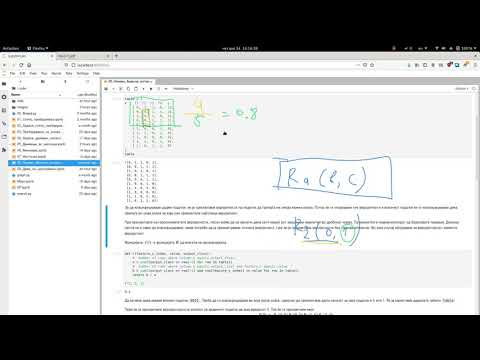

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('l3o_Y5f4UnM')

## Референци
- [Упатство за инсталирање на потребните библиотеки и екстензии](https://docs.google.com/presentation/d/1tnoeNF_ge9KK_ovTF7xgKVB64ltuV27IPShk3ddSK5w/edit#slide=id.ga20dadbc8e_0_0)
- [Објаснување за Наивен Бејесов алгоритам - Џош Страмер](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
- [За Бејесовата теорема - Дерек Милер](https://www.youtube.com/watch?v=R13BD8qKeTg)
- [За Бејесовата теорема - Грант Сандерсон](https://www.youtube.com/watch?v=HZGCoVF3YvM)


Бејесов класификатор е алгоритам за класификација кој на некој начин ја користи [Бејесовата теорема](https://en.wikipedia.org/wiki/Bayes%27_theorem) за да класифицира. Наивен Бејесов класификатор е Бејесов класификатор кој моделира независност помеѓу признаците (карактеристиките) во податочното множество. Објаснување за алгоритамот ќе најдете во книгата на професорката, а следува код кој ја имплементира функцијата од книгата.

Нека е дадена табела `table`. Последната колона `y` е излезна колона, а сите други `f` колони се признаци.

In [3]:
                                #imame 4 vlezni podatoci, kombinacii od edinici i nuli. Realno vkupniot broj kombinacii od edinici i nuli sto moze da se napravi e 2^4=16
                                #tuka se napraveni 10 kombinacii, znaci za 6 bi mozelo da predvidi izlez vo odnos na podatocite na koi e "istreniran" (iako zborov ne e soodveten 
                                #tuka tuku kaj drva na odlucuvanje)
table = [
#    f1  f2  f3  f4   y
    [ 0,  1,  1,  0,  1],
    [ 0,  0,  1,  1,  1],
    [ 1,  0,  1,  0,  1],
    [ 0,  0,  1,  1,  1],
    [ 0,  0,  0,  1,  1],
    [ 1,  0,  0,  1,  0],
    [ 1,  1,  0,  1,  0],
    [ 1,  0,  0,  0,  0],
    [ 1,  1,  0,  1,  0],
    [ 1,  0,  1,  1,  0]
]
table              

[[0, 1, 1, 0, 1],
 [0, 0, 1, 1, 1],
 [1, 0, 1, 0, 1],
 [0, 0, 1, 1, 1],
 [0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 1, 0],
 [1, 0, 1, 1, 0]]

За да класифицираме даден податок, ќе ја пресметаме веројатноста тој податок да припаѓа на секоја можна класа. Потоа ќе ги споредиме тие веројатности и влезниот податок ќе го класифицираме дека припаѓа во онаа класа за која сме пресметале најголема веројатност.

При пресметката на гореспоменатите веројатности, лесно може да се заклучи дека сите имаат ист заеднички именител во дробниот израз. Тој именител е нормализаторот од Бејесовата теорема. Доколку целта ни е само да класифицираме, нема потреба да ја пресметуваме точната веројатност, туку ќе ја пресметаме веројатноста без тој нормализатор. Во овој случај зборуваме за веродостојност наместо веројатност.

Функцијата `r()` е функцијата $R$ од книгата на професорката.

In [5]:

def r(feature_x_index, value, output_class):
    
    #na pr za r2(0,1)
    #feature_x_index=2, value=0, output=y=1
    
    
    #a e suma od site redovi vo koisto poslednata kolona [-1] ima vrednost ednakva na y 
    #odnosno so ovoj cekor se izdvojuvaat samo tie redici vo koisto izlezot soodvetsvuva na nasiot izlez
    a = sum([output_class == row[-1] for row in table])
    #a moze na primer i len(state) da naprajme, pa za sekoj red da ja proveruvame state[len(state)]
    
    
    #vsusnost a e kolku redovi imaat izlez edinica
    
    
    #b e suma od site redovi (niz izdvoenite redovi sto imaat izlez soodveten na nasiot praten) za koisto vazi deka vlezot e ednakov na value pratena
    b = sum([output_class == row[-1] and row[feature_x_index-1] == value for row in table])
    
    return b / a

r(2, 0, 1)

0.8

Да речеме дека имаме влезен податок `0011`. Треба да го класифицираме во која група спаѓа, односно да пресметаме дали излезот за овој податок е 0 или 1. Ќе ја користиме дадената табела `table`.

Прво ќе ја пресметаме веродостојноста излезот за дадениот податок да има вредност 0. Тоа ќе го пресметаме како $$ S(0) = R_1(0, 0) R_2(0, 0) R_3(1, 0) R_4(1, 0) $$
каде $R_a(b, c)$ ја пресметува застапеноста на податоците каде излез е `c`, а признакот `f_a` има вредност `b`, во податоците каде излез е `c`. На овој начин секоја вредност ја пресметуваме статистички. Преку код ова ќе го запишеме како `r(a, b, c)`.

In [ ]:
s_0 = r(1, 0, 0) * r(2, 0, 0) * r(3, 1, 0) * r(4, 1, 0)
s_0

Потоа ќе ја пресметаме веродостојноста излезот за дадениот податок да има вредност 1. Тоа ќе го пресметаме како $$ S(1) = R_1(0, 1) R_2(0, 1) R_3(1, 1) R_4(1, 1) $$.

In [ ]:
s_1 = r(1, 0, 1) * r(2, 0, 1) * r(3, 1, 1) * r(4, 1, 1)
s_1

$S(1) > S(0)$, па заклучуваме дека излезот за дадениот податок е 1. 

## Задача за самостојна работа

Воведете лапласова корекција за да ги избегнеме случаите кога во нашето податочно множество немаме податок дека се случил некој настан кој може да се случи, односно некоја вредност $R_a(b, c) = 0$, како што е дадено во примерот погоре.

## Наивен Бејесов алгоритам преку библиотеката `scikit-learn`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
data = open('data/вести.txt').read().lower().split('\n') #sekoja edna vest e na eden red, lower gi pravi mali bukvite
titles = [d.lstrip('naslov:').strip() for d in data if d.startswith('naslov')] #ako redot zapocnuva so naslov togas kje go otstranime naslov:
#i kje gi trgneme praznite mesta istotaka #kje go zemem naslovot titles
text_bodies = [d.lstrip('tekst:').strip() for d in data if d.startswith('tekst')] #kje go zacuvame tekstot
classes = [d.lstrip('klasa:').strip() for d in data if d.startswith('klasa')] #tuka kje ja zacuvame klasata

In [ ]:
#predprocesiranje na tekst
#gi zemame samo zborovite
texts = [] #listata se polni ts 
for title, text_body in zip(titles, text_bodies): #iterirame niz title+text body (gi spojuva naslovot i tekstot)
    #odime naslov i tekst (zip gi spojuva edno po edno)
    #sega za niv so lower vekje se mali bukvi site
    #i title i text body se zaedno bez tekst: 
    #odime bukva po bukva i ako bukvata e od makedonskata azbuka pritoa site mali
    #i prazno mesto togas ke zacuvame
    #join site spoeni vo string (site bukvi smaleni, trgnati broevi, kk znaci, i samo tekstot ostanal)
    texts.append(''.join(bukva for bukva in title + text_body if bukva in 'абвгдѓежзѕијклљмнњопрстќуфхцчџш '))
    #Vmetnuvame pretprocesiranje na podatoci-otstranuvame nepotrebni raboti na primer br 6 ne ne povrzuva so kultura edno drugo sto e klucno pa ni smeta
    #znaci ke gi zememe samo zborovite 
    #i seedno ni e dali e golema ili mala bukva 

In [ ]:
#vo ovoj moment tekstot ni e obraboten odnosno trgnati se site broevi smaleni site bukvi trgnati se karakteristicnite znaci
#probaj so text[0]

In [ ]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(texts, classes, test_size=0.25, random_state=161)
#go delime podatocnoto mnozestvo

In [ ]:
#Pipeline e procedura ks pravi 3 funkc ednapoedna i kje gi spoi vlez od edna e vlez vo dr itn (?)
clf = Pipeline([
    ('vectorizer', CountVectorizer()), #zima vrednosti od tekst i broi kojkolku pati se ima sluceno na primer  zborot 'na', i gledame deka vo eden tekst se slucuva 15 pati
    ('tfidf', TfidfTransformer()), #izlezot od vectorizer kje se prati tuka i kje se vidi frekvencijata na sekoj zbor na pr od tekst 250 zborovi a na neka e 10
    #znaci 1/25 zacestenost na na 
    ('clf', MultinomialNB(alpha=1e-3)),#toa go prakjame vo ovaa funkcija od scikit learn bibliotekata
    #moze da pratime parametar za da se sluci laplasovata korekcijaaaa 
])

In [ ]:
clf.fit(train_dataset, train_labels)
#go trenirame mnozestvoto i procedurata kje se istrennira

In [ ]:
y_pred = clf.predict(test_dataset)
#dava niza od proceneti klasi

#test labels kje gi dade vistinskite vrednosti
#no ako sakame da vidime kaj gresi pravime
for true, pred in zip(test_labels,y_pred):
    if true!=pred:
        print(true, pred)
        #i kje ispecati koi gi gresi
        
#a ako sakame da znaeme koi se tie vesti sto gi gresi 
for text, true, pred in zip(test_dataset, test_labels, y_pred):
    if true!=pred:
        print (true,'-', pred)
        print(text)
        print('--------------------')

In [ ]:
y_pred_train = clf.predict(train_dataset)


In [ ]:
print('Accuracy Score on train data: ', accuracy_score(y_true=train_labels, y_pred=y_pred_train)) #tocnosta na mnozestvoto sto go ima videno alg za treniranje
print('Accuracy Score on test data: ', accuracy_score(y_true=test_labels, y_pred=y_pred)) #tocnosta na mnozestvoto za test
na pr toa kje znaci od 20 tekstovi 19 se pogodeni
valjda za edno mnozestvo go pustame na treniranje i imame kazano dali e kultura sport etc
a za drugo mnozestvo algoritamot prvpat go gleda